In [36]:
# import dependencies
import os
import numpy as np
import  pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNet, ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import pathlib
import random
import warnings
warnings.filterwarnings("ignore")

In [4]:
# data directories
datadir = "maize_Images/classification/"

In [5]:
os.listdir(datadir)

['magnesium deficiency',
 'multiple',
 'potassium deficiency',
 'herbicide burn',
 'fall army worm',
 'maize streak',
 'sulphur deficiency',
 'healthy',
 'zinc deficiency',
 'stalk borer',
 'nitrogen deficiency']

In [6]:
# class distripution
no_stalkborer = len(os.listdir(datadir + 'stalk borer/'))
no_magnesium = len(os.listdir(datadir + 'magnesium deficiency/'))
no_multiple = len(os.listdir(datadir + 'multiple/'))
no_potassium = len(os.listdir(datadir + 'potassium deficiency/'))
no_burn = len(os.listdir(datadir + 'herbicide burn/'))
no_maize = len(os.listdir(datadir + 'fall army worm/'))
no_streak = len(os.listdir(datadir + 'maize streak/'))
no_sulphur = len(os.listdir(datadir + 'sulphur deficiency/'))
no_healthy = len(os.listdir(datadir + 'healthy/'))
no_zinc = len(os.listdir(datadir + 'zinc deficiency/'))
no_nitrogen = len(os.listdir(datadir + 'nitrogen deficiency/'))

In [7]:
class_dist = [no_stalkborer,no_magnesium,no_multiple
              ,no_potassium,no_burn,no_maize,no_streak,
              no_sulphur, no_healthy
             , no_zinc, no_nitrogen]

In [8]:
distribution = pd.DataFrame(data = [os.listdir(datadir), class_dist])
distribution

,0,1,2,3,4,5,6,7,8,9,10
0,magnesium deficiency,multiple,potassium deficiency,herbicide burn,fall army worm,maize streak,sulphur deficiency,healthy,zinc deficiency,stalk borer,nitrogen deficiency
1,8,7,34,2,29,597,15,3,37,128,4


In [9]:
dataroot = pathlib.Path(datadir)
all_images = dataroot.glob("*/*")
all_images = [str(path) for path in all_images]

In [10]:
image_count = len(all_images)
image_count

864

In [11]:
img = plt.imread(random.choice(all_images))
img.shape

(1840, 3264, 3)

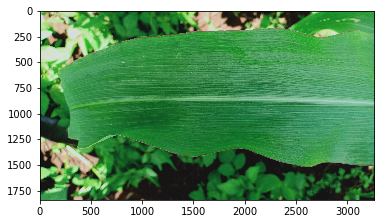

In [12]:
plt.imshow(img)

In [67]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(datadir)
    return image_rel

In [ ]:
for n in range(6):
    image_path = random.choice(all_images)
    display.display(display.Image(image_path))
    print(caption_image(image_path))
    print()

In [13]:
# loading images
datagen = ImageDataGenerator(horizontal_flip=True,rotation_range=0.5,rescale=1/255.0)

In [17]:
image_data = datagen.flow_from_directory(datadir,target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 864 images belonging to 11 classes.


In [18]:
for image_batch, label_batch in image_data:
    print("image shape",image_batch.shape)
    print("Label shape", label_batch.shape)
    break

image shape (32, 224, 224, 3)
Label shape (32, 11)


In [35]:
base_model=ResNet50(weights="imagenet",include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

/home/ailead/anaconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [37]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(11,activation='softmax')(x)

In [38]:
model=Model(inputs=base_model.input,outputs=preds)

In [39]:
for layer in model.layers:
    layer.trainable=False

In [40]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy



In [ ]:
step_size_train=image_data.n//image_data.batch_size
hist = model.fit_generator(generator=image_data,
                   steps_per_epoch=step_size_train, epochs=10)

Epoch 1/10
12/27 [============>.................] - ETA: 5:26 - loss: 2.5064 - acc: 0.0208